# DESRIPTION OF PROJECT IN BREAF

#### *Creating the moddel that predicts whether or not a loan default using te historical data 

#### Problem statement:-


1) For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, 
 using the historical data from `2007 `
to `2015`, you have
to build a `deep learning model `to predict the chance of `default `
for future loans. As you will see later this dataset is highly` imbalanced` and includes a lot of features that makes this problem more challenging.


1.     Feature Transformation
•	Transform categorical values into numerical values (discrete)
2.     Exploratory data analysis of different factors of the dataset.
3.     `Additional Feature Engineering`
•	You will check the `correlation` between features and will drop those features which have a strong correlation
•	This will help reduce the number of features and will leave you with the most relevant features
4.     Modeling
•	After applying `EDA` and `feature engineering`, you are now ready to build the `predictive` models
•	In this part, you will create a deep `learning model`` using Keras with Tensorflow `backend


In [1]:
#lets import requrement
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
%time

Wall time: 0 ns


In [4]:
%timeit

In [5]:
import time
time.time()

1636539883.4323852

In [6]:
#import the data 
Loan_data = pd.read_csv("Loan_data.csv")

In [7]:
Loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
print('Size = ', Loan_data.size)

Size =  134092


In [10]:
#range of entries -total size of the data 
9578-Loan_data.size

-124514

<AxesSubplot:>

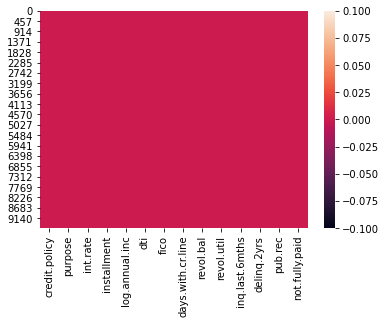

In [11]:
#we have highly imbalence data w will take steps this little latter 
sns.heatmap(Loan_data.isnull(), cbar=True)

In [12]:
#pip install missingno
import missingno as msno

<AxesSubplot:>

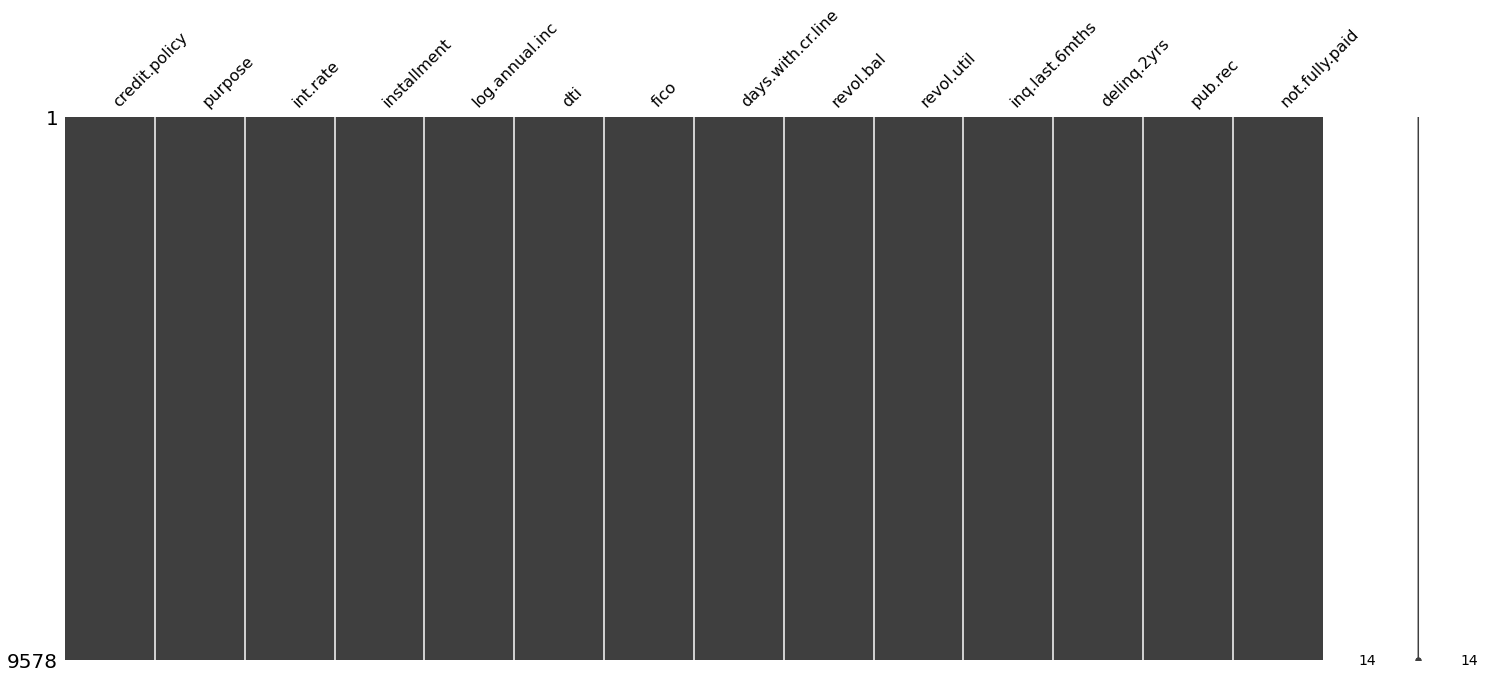

In [13]:
msno.matrix(Loan_data)

In [14]:
#msno.heatmap(Loan_data) this will not gives us suffient visualisation descriptions all 


In [15]:
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

In [16]:
import pandas as pd 
import pandas_profiling as pp


In [17]:
profile = pp.ProfileReport(Loan_data)
profile.to_file("Loan_data_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1) lets perfoem feature engineering feature scaling steps on Loan_data we have 

In [18]:
Loan_data.isnull().sum()


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [19]:
Loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [20]:
Loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [21]:
Loan_data['purpose'].values

array(['debt_consolidation', 'credit_card', 'debt_consolidation', ...,
       'debt_consolidation', 'home_improvement', 'debt_consolidation'],
      dtype=object)

In [22]:
Loan_data['credit.policy'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:

def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = final_df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

In [ ]:
matrix = final_df.corr().abs()

In [ ]:
matrix

In [ ]:
mask = np.triu(np.ones_like(matrix, dtype=bool))

reduced_matrix = matrix.mask(mask)

In [ ]:

# Find columns that meet the 0.90 threshold
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.9)]

In [ ]:
to_drop

In [ ]:
to_drop = set()

for column in reduced_matrix.columns:
    for index in reduced_matrix.index:
        if reduced_matrix.loc[index, column] > 0.9:
            to_drop.add(column)

In [ ]:
to_drop

In [ ]:

def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = final_df.corr().abs()
    
    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask)
    
    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if \
              any(reduced_matrix[c] > threshold)]
    
    return to_drop

In [ ]:
Loan_data.info()

In [25]:
##Loan_data["int.rate",'installment','log.annual.inc','dti','days.with.cr.line','revol.util']=Loan_data["int.rate",'installment','log.annual.inc','dti','days.with.cr.line','revol.util'].astype(int)
#print(Loan_data.dtypes)
Loan_data = Loan_data.astype({"int.rate":"int","installment":"int",'log.annual.inc':'int','dti':'int','days.with.cr.line':"int",'revol.util':'int'})
#print(Loan_data.dtypes)
Loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit.policy      9578 non-null   int64 
 1   purpose            9578 non-null   object
 2   int.rate           9578 non-null   int32 
 3   installment        9578 non-null   int32 
 4   log.annual.inc     9578 non-null   int32 
 5   dti                9578 non-null   int32 
 6   fico               9578 non-null   int64 
 7   days.with.cr.line  9578 non-null   int32 
 8   revol.bal          9578 non-null   int64 
 9   revol.util         9578 non-null   int32 
 10  inq.last.6mths     9578 non-null   int64 
 11  delinq.2yrs        9578 non-null   int64 
 12  pub.rec            9578 non-null   int64 
 13  not.fully.paid     9578 non-null   int64 
dtypes: int32(6), int64(7), object(1)
memory usage: 823.2+ KB


In [32]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(Loan_data[['purpose']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = Loan_data.join(encoder_df)

#view final df
#print(final_df)

In [33]:
final_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
0,1,debt_consolidation,0,829,11,19,737,5639,28854,52,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,credit_card,0,228,11,14,707,2760,33623,76,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0,366,10,11,682,4710,3511,25,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,debt_consolidation,0,162,11,8,712,2699,33667,73,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,credit_card,0,102,11,14,667,4066,4740,39,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
corr = final_df.corr()

In [35]:
corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
credit.policy,1.000000,NaN,0.058768,0.033184,-0.091507,0.348319,0.099027,-0.187518,-0.104335,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.058768,NaN,1.000000,0.406646,0.048645,0.086067,0.183319,0.233635,0.081187,-0.010401,-0.004357,-0.032760,0.049933,-0.203094,0.000768,0.161658,-0.094511,0.023054,-0.079816,0.145600
log.annual.inc,0.033184,NaN,0.406646,1.000000,-0.052261,0.104963,0.299327,0.329924,0.043155,0.032200,0.028730,0.024038,-0.023333,-0.069907,0.063580,-0.027477,-0.108975,0.108338,-0.027432,0.086066
dti,-0.091507,NaN,0.048645,-0.052261,1.000000,-0.240875,0.059205,0.188525,0.335481,0.029106,-0.022113,0.006697,0.037668,-0.124463,0.083975,0.178561,-0.034936,-0.093375,-0.077903,-0.069300
fico,0.348319,NaN,0.086067,0.104963,-0.240875,1.000000,0.263879,-0.015553,-0.541588,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099027,NaN,0.183319,0.299327,0.059205,0.263879,1.000000,0.229346,-0.024399,-0.041737,0.081372,0.071829,-0.029237,-0.056573,0.046219,-0.009316,-0.042623,0.068084,-0.020562,0.034883
revol.bal,-0.187518,NaN,0.233635,0.329924,0.188525,-0.015553,0.229346,1.000000,0.203786,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104335,NaN,0.081187,0.043155,0.335481,-0.541588,-0.024399,0.203786,1.000000,-0.013870,-0.042535,0.066682,0.082030,-0.138456,0.091358,0.211720,-0.053066,-0.114561,-0.107911,-0.060928
inq.last.6mths,-0.535511,NaN,-0.010401,0.032200,0.029106,-0.185293,-0.041737,0.022394,-0.013870,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


<AxesSubplot:>

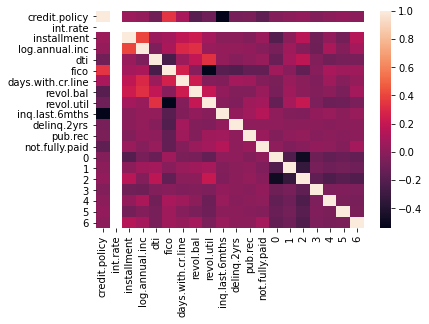

In [36]:
sns.heatmap(corr)

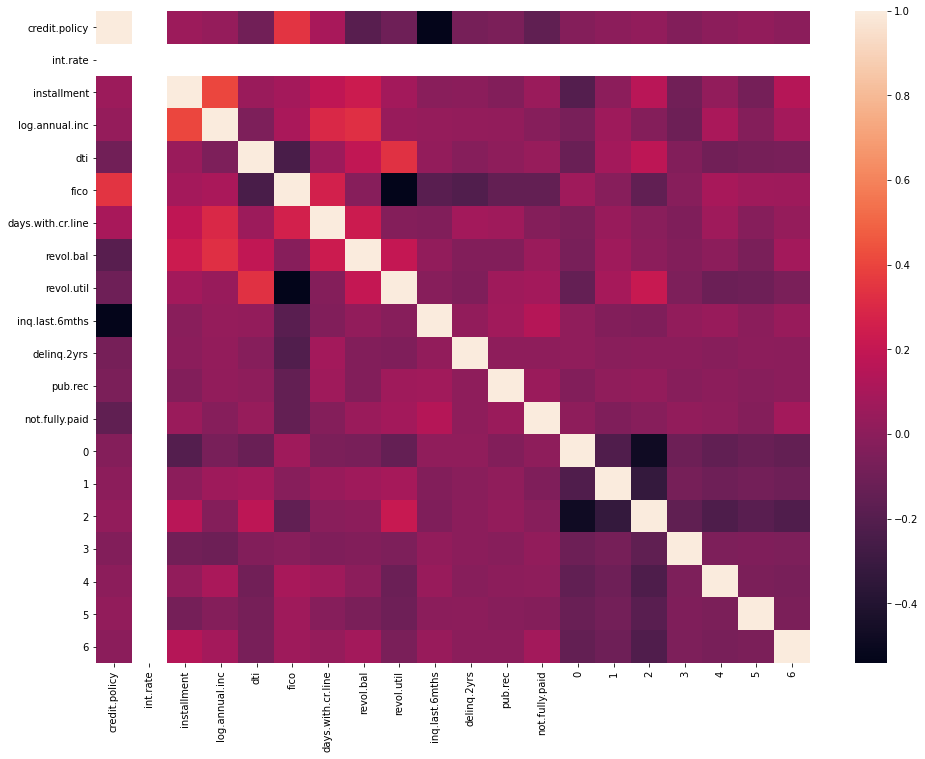

In [37]:
matrix = final_df.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

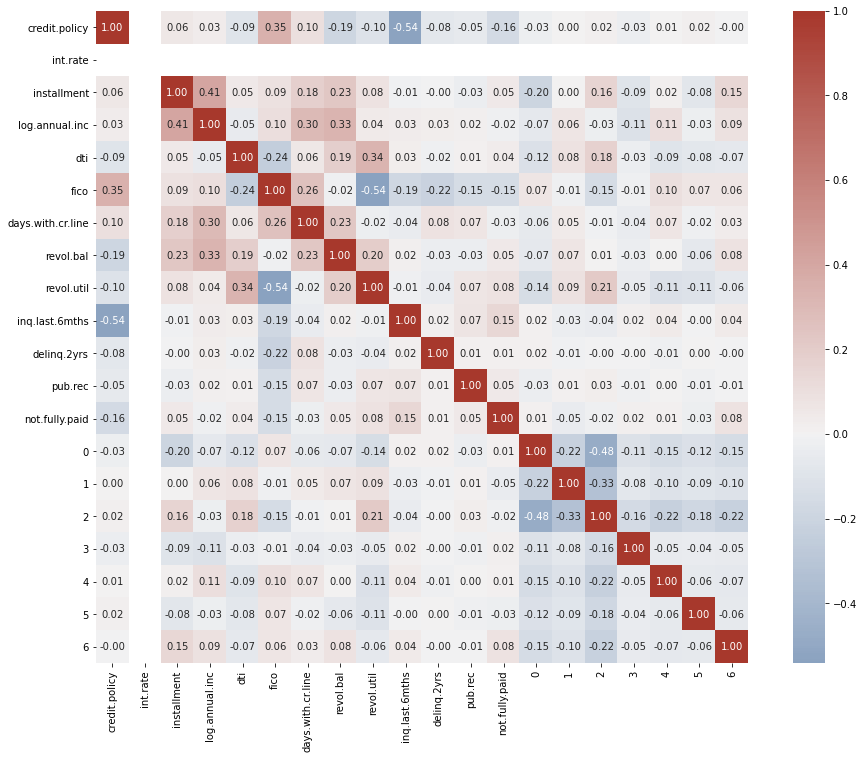

In [38]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

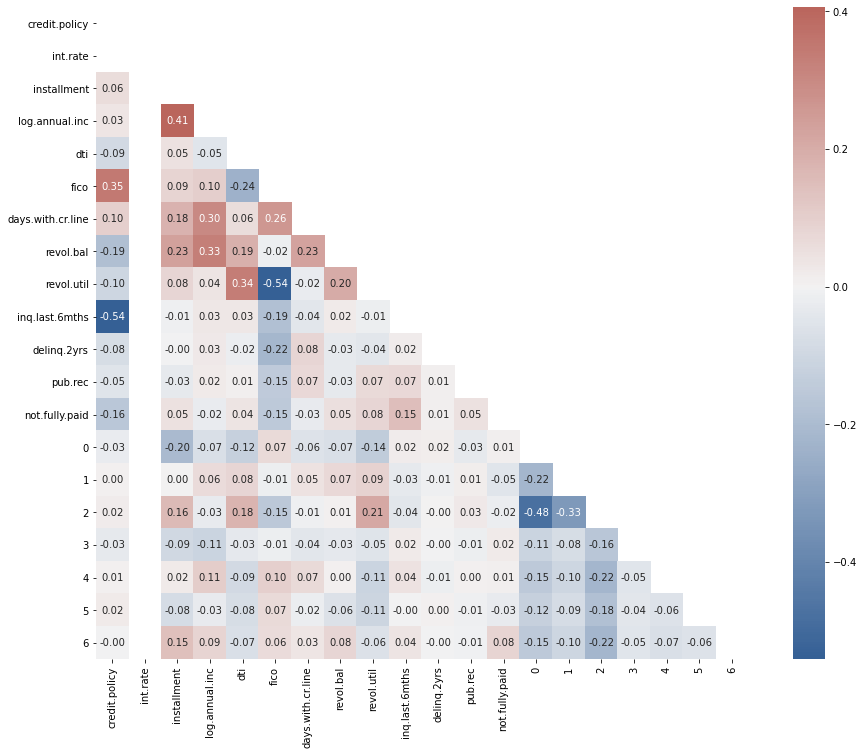

In [39]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [40]:
def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = final_df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

In [41]:
final_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
0,1,debt_consolidation,0,829,11,19,737,5639,28854,52,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,credit_card,0,228,11,14,707,2760,33623,76,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0,366,10,11,682,4710,3511,25,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,debt_consolidation,0,162,11,8,712,2699,33667,73,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,credit_card,0,102,11,14,667,4066,4740,39,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
updated_Loan_data = final_df.drop(columns = ['purpose'])

In [68]:
# Now trying to fill the NaN value equal to 3.
prepared_Loan_data = updated_Loan_data.fillna(0)


In [69]:
X =prepared_Loan_data.drop('credit.policy',axis = 1)#--feature matrix
y = prepared_Loan_data['credit.policy']

In [70]:
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
0,0,829,11,19,737,5639,28854,52,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,228,11,14,707,2760,33623,76,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,366,10,11,682,4710,3511,25,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,162,11,8,712,2699,33667,73,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,102,11,14,667,4066,4740,39,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
y.head(10),y.tail()#just to cross check wether the target are present  or not 

(0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: credit.policy, dtype: int64,
 9573    0
 9574    0
 9575    0
 9576    0
 9577    0
 Name: credit.policy, dtype: int64)

In [72]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((6704, 19), (2874, 19))

In [73]:
X_train.corr()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
int.rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,1.000000,0.403802,0.051522,0.082026,0.179433,0.241562,0.093617,-0.012958,-0.002978,-0.028204,0.036514,-0.209608,-0.001401,0.166750,-0.090090,0.027095,-0.080239,0.143528
log.annual.inc,NaN,0.403802,1.000000,-0.054726,0.116705,0.291329,0.326055,0.047756,0.028129,0.022114,0.017725,-0.035793,-0.071838,0.070811,-0.027795,-0.117601,0.109016,-0.034921,0.091020
dti,NaN,0.051522,-0.054726,1.000000,-0.231847,0.053476,0.187069,0.329174,0.018252,-0.034026,0.003771,0.044923,-0.119682,0.090426,0.174721,-0.034576,-0.105123,-0.078216,-0.067786
fico,NaN,0.082026,0.116705,-0.231847,1.000000,0.265388,-0.007992,-0.539293,-0.182494,-0.214804,-0.149540,-0.151303,0.060009,-0.017569,-0.132560,-0.027546,0.095043,0.067899,0.051766
days.with.cr.line,NaN,0.179433,0.291329,0.053476,0.265388,1.000000,0.236571,-0.020691,-0.039164,0.072504,0.071450,-0.025424,-0.055151,0.039173,-0.002257,-0.052415,0.069646,-0.019088,0.031955
revol.bal,NaN,0.241562,0.326055,0.187069,-0.007992,0.236571,1.000000,0.204575,0.019940,-0.040257,-0.028251,0.056611,-0.062757,0.079800,0.002538,-0.036643,-0.004302,-0.064793,0.080905
revol.util,NaN,0.093617,0.047756,0.329174,-0.539293,-0.020691,0.204575,1.000000,-0.008027,-0.041718,0.063205,0.090536,-0.134045,0.098143,0.192498,-0.032038,-0.117972,-0.104787,-0.055197
inq.last.6mths,NaN,-0.012958,0.028129,0.018252,-0.182494,-0.039164,0.019940,-0.008027,1.000000,0.031458,0.089298,0.153949,0.019495,-0.025081,-0.055412,0.034560,0.037997,-0.013318,0.059119
delinq.2yrs,NaN,-0.002978,0.022114,-0.034026,-0.214804,0.072504,-0.040257,-0.041718,0.031458,1.000000,0.020148,0.002454,0.019327,-0.008840,-0.010160,-0.007255,-0.010465,0.014308,0.002558


In [75]:
prepared_Loan_data.isnull().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
dtype: int64

In [76]:
X_train.corr()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
int.rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,1.000000,0.403802,0.051522,0.082026,0.179433,0.241562,0.093617,-0.012958,-0.002978,-0.028204,0.036514,-0.209608,-0.001401,0.166750,-0.090090,0.027095,-0.080239,0.143528
log.annual.inc,NaN,0.403802,1.000000,-0.054726,0.116705,0.291329,0.326055,0.047756,0.028129,0.022114,0.017725,-0.035793,-0.071838,0.070811,-0.027795,-0.117601,0.109016,-0.034921,0.091020
dti,NaN,0.051522,-0.054726,1.000000,-0.231847,0.053476,0.187069,0.329174,0.018252,-0.034026,0.003771,0.044923,-0.119682,0.090426,0.174721,-0.034576,-0.105123,-0.078216,-0.067786
fico,NaN,0.082026,0.116705,-0.231847,1.000000,0.265388,-0.007992,-0.539293,-0.182494,-0.214804,-0.149540,-0.151303,0.060009,-0.017569,-0.132560,-0.027546,0.095043,0.067899,0.051766
days.with.cr.line,NaN,0.179433,0.291329,0.053476,0.265388,1.000000,0.236571,-0.020691,-0.039164,0.072504,0.071450,-0.025424,-0.055151,0.039173,-0.002257,-0.052415,0.069646,-0.019088,0.031955
revol.bal,NaN,0.241562,0.326055,0.187069,-0.007992,0.236571,1.000000,0.204575,0.019940,-0.040257,-0.028251,0.056611,-0.062757,0.079800,0.002538,-0.036643,-0.004302,-0.064793,0.080905
revol.util,NaN,0.093617,0.047756,0.329174,-0.539293,-0.020691,0.204575,1.000000,-0.008027,-0.041718,0.063205,0.090536,-0.134045,0.098143,0.192498,-0.032038,-0.117972,-0.104787,-0.055197
inq.last.6mths,NaN,-0.012958,0.028129,0.018252,-0.182494,-0.039164,0.019940,-0.008027,1.000000,0.031458,0.089298,0.153949,0.019495,-0.025081,-0.055412,0.034560,0.037997,-0.013318,0.059119
delinq.2yrs,NaN,-0.002978,0.022114,-0.034026,-0.214804,0.072504,-0.040257,-0.041718,0.031458,1.000000,0.020148,0.002454,0.019327,-0.008840,-0.010160,-0.007255,-0.010465,0.014308,0.002558


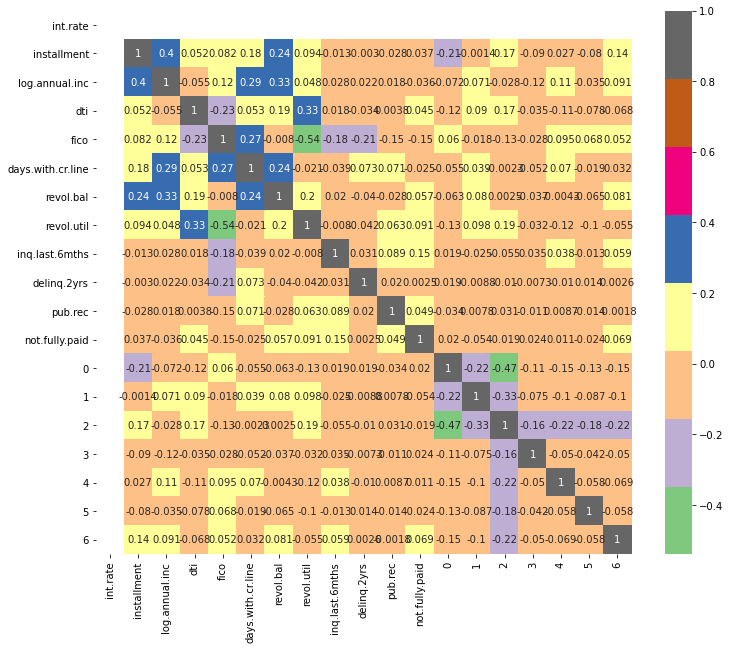

In [81]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

In [86]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [90]:

corr_features = correlation(X_train, 0.6)
len(set(corr_features))

0

In [91]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,0,1,2,3,4,5,6
3343,0,49,10,16,687,2314,962,64,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,84,10,10,707,2730,5630,23,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1741,0,712,11,13,672,4830,16473,94,2,2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5160,0,286,11,19,667,7020,19892,67,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7760,0,202,9,4,657,898,5251,49,9,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0,636,11,15,707,7991,28260,45,3,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6920,0,896,11,2,747,8822,14556,94,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8575,0,148,10,21,652,5519,17817,55,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4528,0,330,10,15,672,3240,10565,80,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Buildig the ANN and initialize the Ann

In [97]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [98]:
tf.__version__

'2.3.0'

In [100]:
#Adding the input layer and first layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [101]:
#Adding the second layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [102]:
#Adding the otput layers
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


#### Now trainann model

In [103]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [104]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

210/210 [==============================] - 0s 1ms/step - loss: 258.8015 - accuracy: 0.8076
Epoch 2/100
210/210 [==============================] - 0s 2ms/step - loss: 14.3379 - accuracy: 0.5683
Epoch 3/100
210/210 [==============================] - 0s 1ms/step - loss: 0.7523 - accuracy: 0.6674
Epoch 4/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.7798
Epoch 5/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.7566


210/210 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8179
Epoch 75/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8180
Epoch 76/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8180
Epoch 77/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.8188
Epoch 78/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.8174
Epoch 79/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.8212
Epoch 80/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8180
Epoch 81/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.8188
Epoch 82/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8162
Epoch 83/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 

In [108]:
# y_pred = ann.predict(X_test)
# y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  34  542]
 [   6 2292]]


0.8093249826026444